In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import ompy as om
from pathlib import Path

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
p = Path("../OCL_response_functions/oscar2017_scale1.15/")
R = om.Response(p, suffix='.m')

<IPython.core.display.Javascript object>


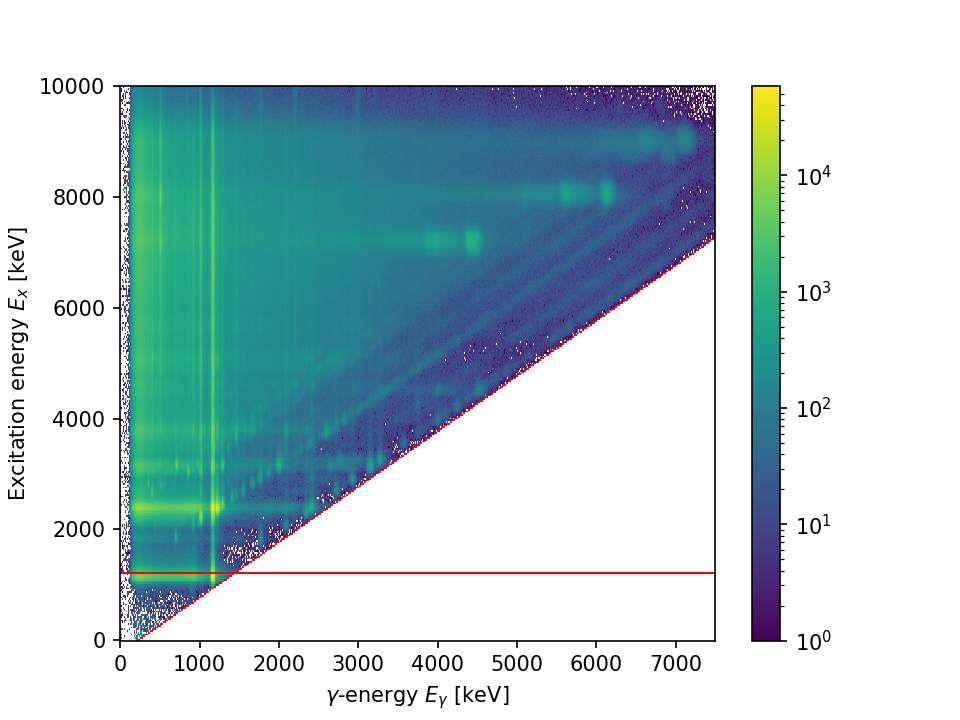

<IPython.core.display.Javascript object>


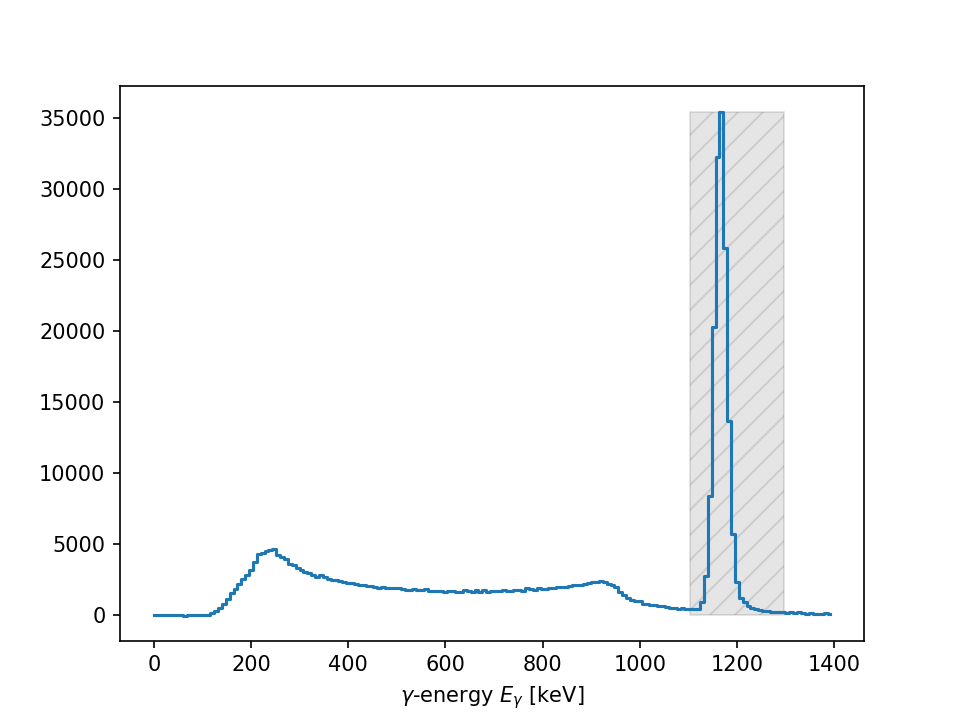

In [13]:
m = om.Matrix(path='120Sn_raw_without_bg.m')
m = m.loc[:'10MeV', :'7.5MeV']
line = om.Line(p1=('1MeV', '0.75MeV'), slope=1)
m[line.above(m)] = 0
ax, _ = m.plot()
ax.axhline(y=1200, lw=1, color='r')
line.plot(m, ax=ax)
spectrum = m.loc['1.2MeV', :'1.4MeV']
ax = spectrum.plot()
region = (1.1e3 < spectrum.E) & (spectrum.E < 1.3e3)
#e = spectrum.E[region]
#ax.fill_betweenx(range(int(max(spectrum))), min(e), max(e), color='k', alpha=0.1, )
ax.fill_between(spectrum.E, max(spectrum.values), where=region, color='k', alpha=0.1, hatch='//')

<IPython.core.display.Javascript object>


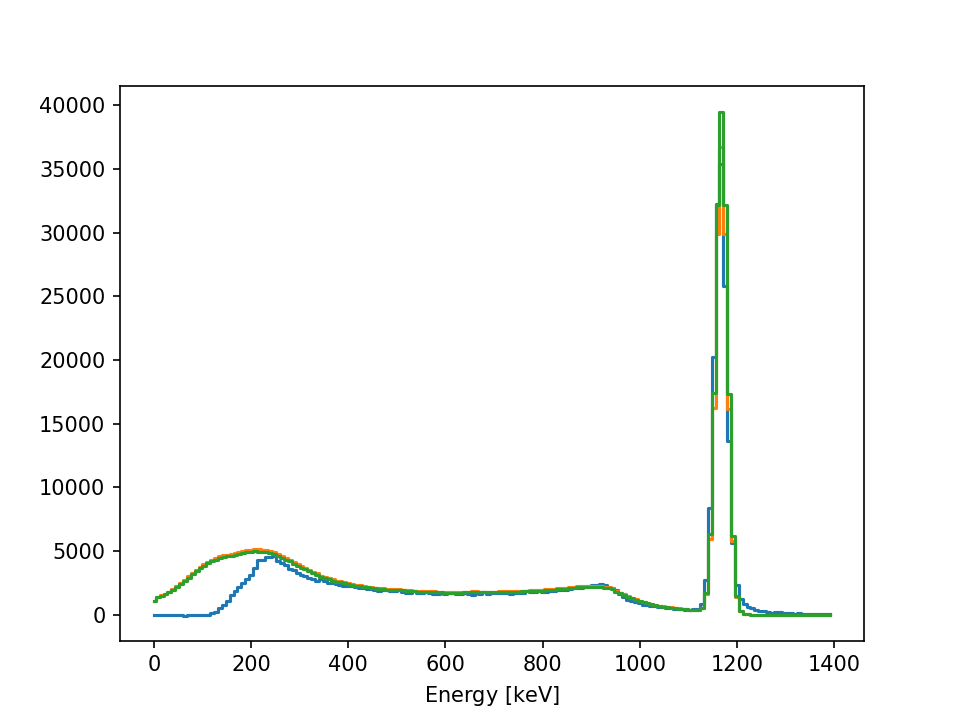

Energy: 256.0 to 1392.0 [keV]
143 bins with dE: 8.0
Total counts: 355105.0
[ 4235.  4043.  3936.  3591.  3513.  3269.  3158.  3013.  2907.  2801.
  2632.  2801.  2672.  2523.  2459.  2410.  2342.  2286.  2249.  2257.
  2160.  2121.  2119.  2048.  2020.  1927.  1891.  1965.  1909.  1859.
  1892.  1910.  1814.  1735.  1746.  1835.  1710.  1726.  1781.  1677.
  1646.  1663.  1693.  1624.  1692.  1687.  1610.  1601.  1737.  1669.
  1579.  1742.  1626.  1762.  1631.  1679.  1675.  1686.  1744.  1693.
  1671.  1748.  1745.  1691.  1886.  1809.  1766.  1880.  1821.  1793.
  1866.  1907.  1926.  1968.  1977.  1998.  2067.  2112.  2124.  2193.
  2228.  2319.  2320.  2397.  2313.  2130.  2104.  1919.  1622.  1420.
  1191.  1050.   971.   942.   765.   770.   670.   666.   593.   590.
   529.   499.   467.   420.   446.   386.   371.   426.   429.   877.
  2726.  8375. 20277. 32223. 35435. 25842. 13675.  5660.  2320.  1202.
   887.   613.   497.   411.   321.   286.   239.   175.   224.   191.
  

In [156]:
r = R.interpolate(spectrum.E, 30)
r2 = R.interpolate(spectrum.E, 30, compton=0.9)

ax=spectrum.plot()
delta = spectrum.clone()
delta[:] = 0
delta.loc[1162] = 487929*0.9
f = r.T@delta
f2 = r2.T@delta
f.plot(ax=ax)
f2.plot(ax=ax)
print(spectrum.loc[250:].__str__())
print(f.loc[250:].__str__())
print(f2.loc[250:].__str__())

In [15]:
c = om.Calibrator(R, spectrum)

<IPython.core.display.Javascript object>


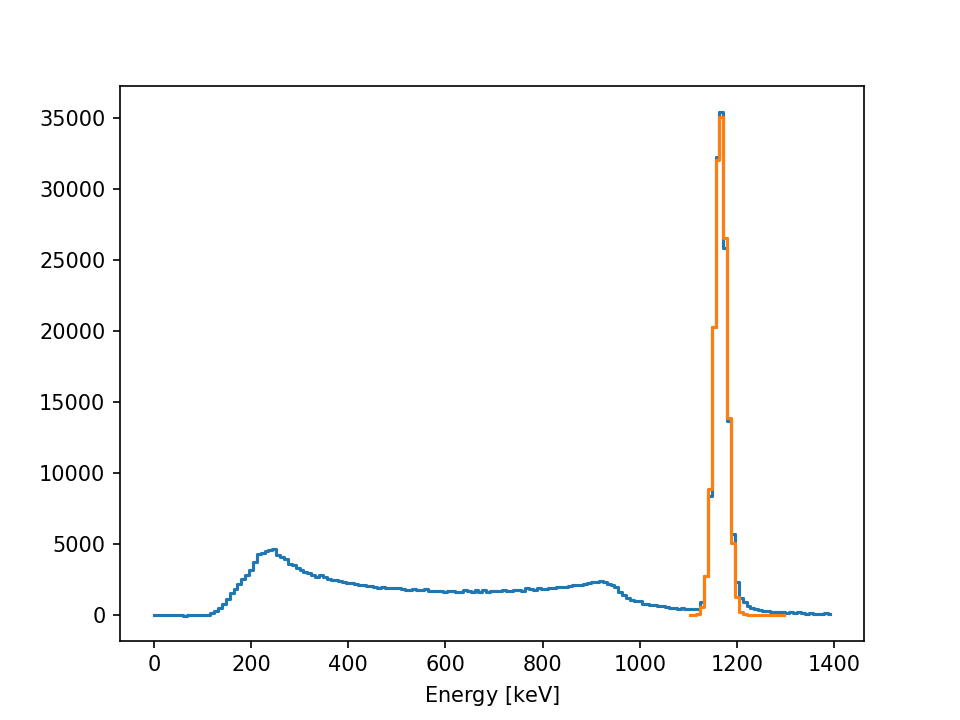

<AxesSubplot: xlabel='Energy [$\\mathrm{keV}$]'>

In [16]:
fit = c.fit_FWHM(region)
ax = spectrum.plot()
fit.plot(ax=ax)

In [17]:
c.calibrate_FWHM()

p0: [1200.0, 153853.0]
 final_simplex: (array([[  1162.38154449, 487929.10864054],
       [  1162.38146148, 487929.10862023],
       [  1162.38157875, 487929.10860941]]), array([1989354.7448458, 1989354.7448458, 1989354.7448458]))
           fun: 1989354.7448457961
       message: 'Optimization terminated successfully.'
          nfev: 150
           nit: 76
        status: 0
       success: True
             x: array([  1162.38154449, 487929.10864054])


<IPython.core.display.Javascript object>


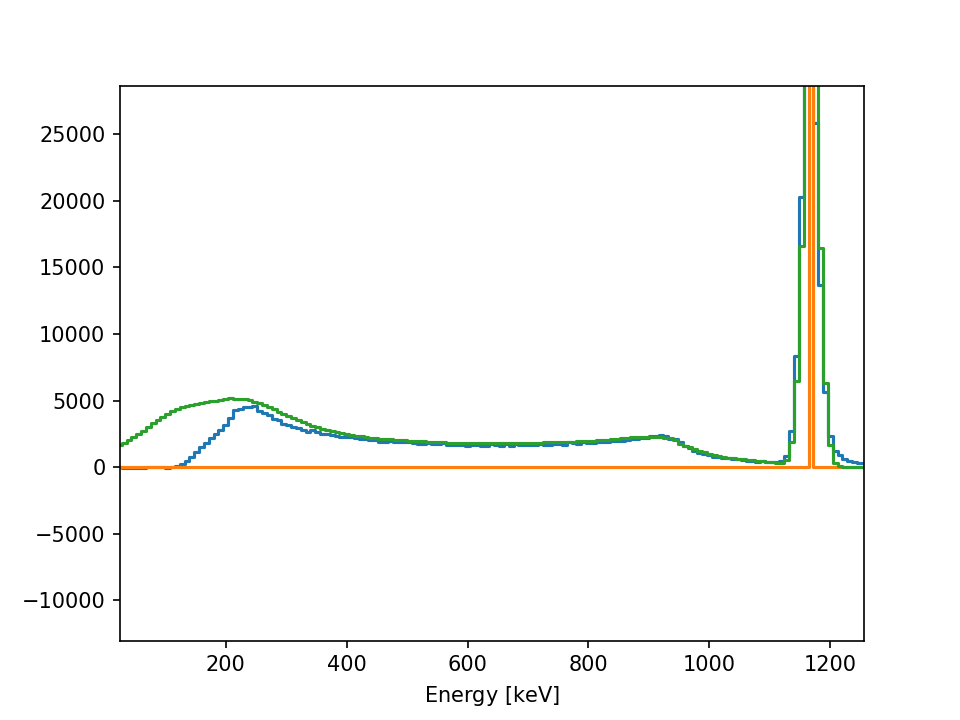

In [18]:
c.fit_FE(region)

<IPython.core.display.Javascript object>


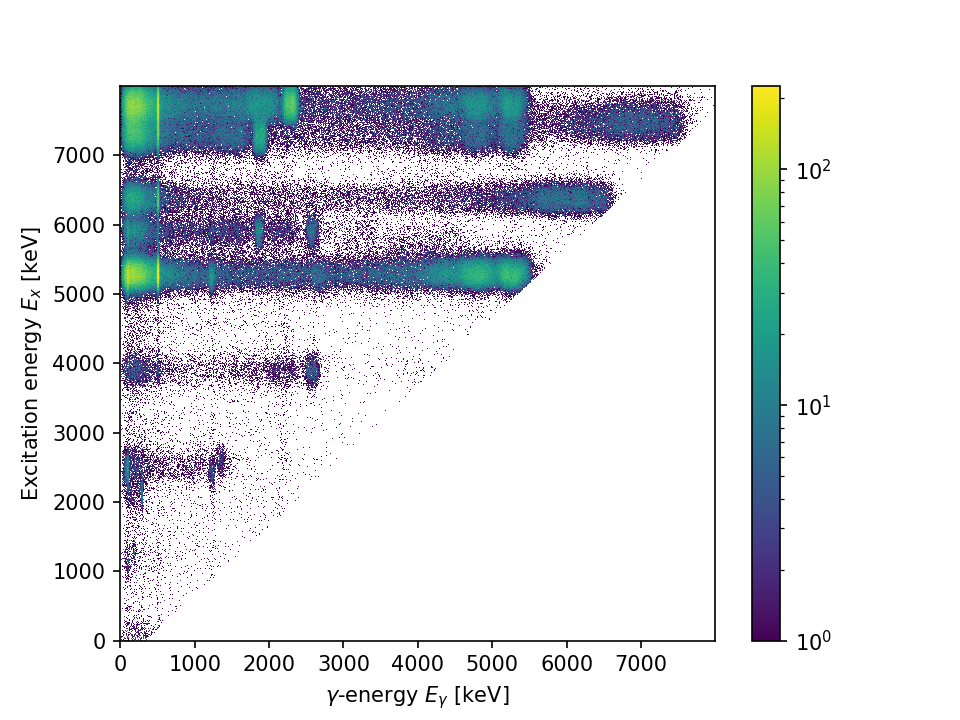

(<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7f2008447880>,
  <matplotlib.colorbar.Colorbar at 0x7f200a643d00>))

In [34]:
m = om.Matrix(path="./12C_raw.m")
m = m.loc[:'8MeV', :'8MeV']
line = om.Line(p1=('1MeV', '0.65MeV'), slope=1)
m[line.above(m)] = 0
m.plot()

In [126]:
data = om.get_nucleus('12C')

<IPython.core.display.Javascript object>


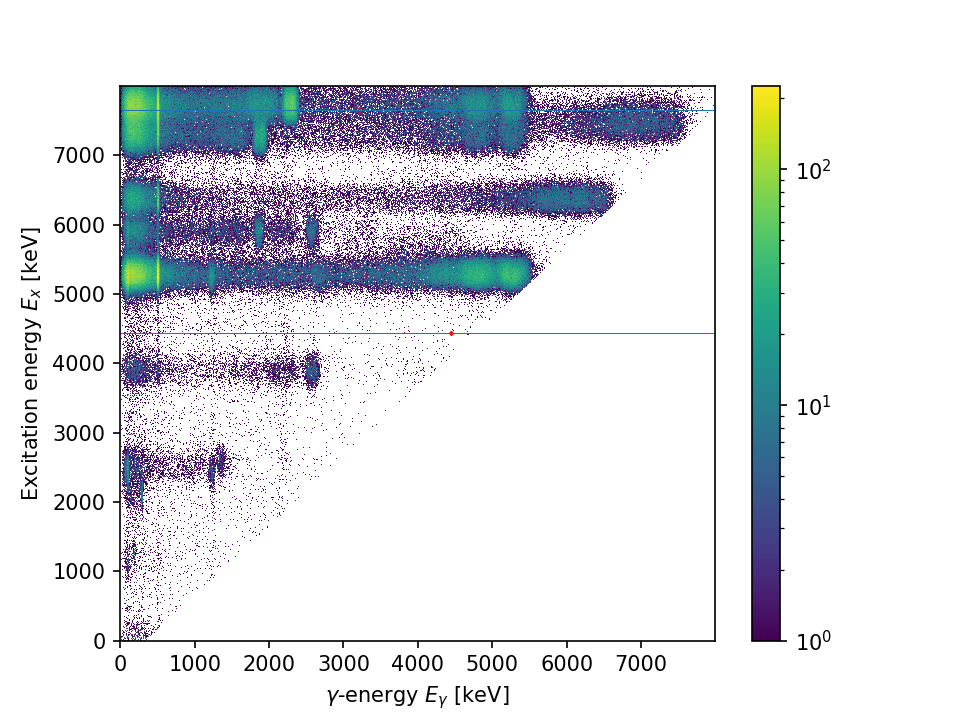

4439.82 4438.94
7654.07 3213.79


<AxesSubplot: xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>

In [127]:
ax, _ = m.plot()
data.gammas.query('Ei < 8000').scatter(ax=ax, marker='x', s=2, color='r')
data.levels.query('E < 8000').plot(ax=ax, lw=0.5)

In [112]:
d2 =data.gammas.query('Ei < 8000')

In [115]:
print(d2)

120.42 keV → 0.00 keV: Eg 120.42 keV, 0-, T=5.25 US 6 keV
298.22 keV → 0.00 keV: Eg 298.22 keV, 3-, T=91.3 PS 13 keV
397.27 keV → 0.00 keV: Eg 397.27 keV, 1-, T=3.90 PS 4 keV
397.27 keV → 120.42 keV: Eg 276.85 keV, 1-, T=3.90 PS 4 keV



In [116]:
l, g = om.get_nucleus_df('16N')

In [117]:
g['E Gamma']

0    120.42
1    298.22
2    397.27
3    276.85
Name: E Gamma, dtype: float64

# 167Ho

In [22]:
holm = om.Matrix(path="./167Ho_raw.m")
holm2 = om.Matrix(path="./167Ho_raw_with_bg.m")

<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>

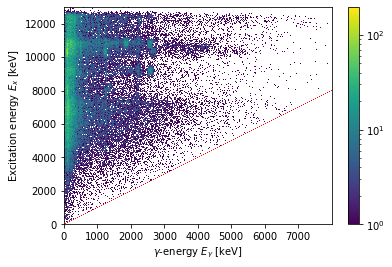

In [23]:
holm = holm.loc[:'13MeV', :'8MeV']
line = om.Line(slope=1, p1=(0,0))
holm[line.above(holm)] = 0
ax, _ = holm.plot()
line.plot(holm, ax=ax)

In [6]:
holm.summary()

Eᵧ: 0.0 to 16376.0 [keV]
2048 bins with dEᵧ: 8.0
Eₓ: 0.0 to 16376.0 [keV]
2048 bins with dEₓ: 8.0
Total counts: 2,200,966.0



In [7]:
holm2.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f2f2c100>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f2f4eaa0>))

In [8]:
bg = holm2 - holm
bg.plot()

<IPython.core.display.Javascript object>

(<AxesSubplot:xlabel='$\\gamma$-energy $E_{\\gamma}$ [$\\mathrm{keV}$]', ylabel='Excitation energy $E_{x}$ [$\\mathrm{keV}$]'>,
 (<matplotlib.collections.QuadMesh at 0x7fc5f3516da0>,
  <matplotlib.colorbar.Colorbar at 0x7fc5f3499150>))